# Setup

# TODO:

priorities:

figure 5
instead of showing raw masks - show the peaks used to select the bandwidths

- power analysis for aim 2
- measures for aim 2 (better than the ones we have? look at interaction)

In [1]:
include(joinpath("..","src","setup.jl"))

┌ Info: Loading Cairo backend into Compose.jl
└ @ Compose /Users/davidlittle/.julia/packages/Compose/BYWXX/src/Compose.jl:161
┌ Warning: Package Compose does not have Cairo in its dependencies:
│ - If you have Compose checked out for development and have
│   added Cairo as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Compose
│ Loading Cairo into Compose from project dependency, future warnings for Compose are suppressed.
└ @ nothing nothing:840
┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v1.0/Gadfly/DvECm.ji for Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1190
┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /Users/davidlittle/.julia/packages/Gadfly/ew1SM/src/mapping.jl:228


RObject{VecSxp}
$rcalljl_options
$rcalljl_options$height
[1] 360

$rcalljl_options$width
[1] 432




In [2]:
datadir = joinpath("..","data","count_lengths","run_2018-11-26")

"../data/count_lengths/run_2018-11-26"

In [3]:
params = load_params(joinpath(datadir,"params.jld2"))
params[:pindex] = 1:size(params,1)
settings = joinpath("..","src","settings.toml")

results = []
for_results_in(joinpath(datadir,"data"),reinterpret="reinterpret") do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df = vcat(results...);
head(df)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:06


,length,percepts,created,pindex
,Float64,Int64,DateTime,Int64
1,0.2,2,2018-11-26T17:38:30.128,1
2,11.4,1,2018-11-26T17:38:30.128,1
3,0.4,2,2018-11-26T17:38:30.128,1
4,5.1,1,2018-11-26T17:38:30.128,1
5,0.4,2,2018-11-26T17:38:30.128,1
6,18.6,1,2018-11-26T17:38:30.128,1


# Figure 4A

**note**: figure 3 requires output from figure 4 to be processed, it is not generated until after figure 4

In [4]:
hstr,hlen = human_error_by_sid(resample=1000,N=N_for_pressnitzer_hupe_2006);

In [5]:
quantile(hlen.x1,(0.025,0.5,0.975))

(0.1205479452054794, 0.20958904109589033, 0.36723744292237437)

In [6]:
fields = [:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]
progress = Progress(nrow(unique(params[fields])))
df_summary = by(params,fields) do row
    next!(progress)
    err = model_error(df,params;(k => row[1,k] for k in fields)...)
    DataFrame(stream_error = err.stream,length_error = err.lengths,eratio = error_ratio(err,human_error(N=N_for_pressnitzer_hupe_2006)))
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:36


,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ,stream_error,length_error,eratio
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.474594,0.410298,2.84557
2,0.0,5.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.261357,0.293669,1.72064
3,0.0,15.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.265539,0.388889,1.96294
4,0.0,44.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.262928,1.0,3.35567
5,0.0,130.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.26317,1.0,3.35318
6,0.0,390.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.262932,1.0,3.36631
7,0.0,1100.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.27456,0.720018,2.77602
8,0.0,3400.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.263395,1.0,3.36961
9,0.0,10000.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.264263,1.0,3.37967


In [7]:
dfplot_ind = @linq df_summary |>
    rename_levels_for([:stream_error,:length_error,:eratio]) |>
    transform(a = packaxes(:c_a,pad=0.25), m = packaxes(:c_m,pad=0.25), rand = randn(length(:c_a))) |>
    transform(eratio_str = fmt.("01.1f",round.(:eratio,digits=1)))
              
head(dfplot_ind)

,c_a,c_m,level,stream_error,length_error,eratio,a,m,rand,eratio_str
,Float64,Float64,String,Float64,Float64,Float64,Float64,Float64,Float64,String
1,0.0,0.0,Peripheral,0.474594,0.410298,2.84557,0.0,0.0,0.78393,2.8
2,0.0,5.0,Peripheral,0.261357,0.293669,1.72064,0.0,1.25,-0.266444,1.7
3,0.0,15.0,Peripheral,0.265539,0.388889,1.96294,0.0,2.25,0.428844,2.0
4,0.0,44.0,Peripheral,0.262928,1.0,3.35567,0.0,3.25,0.910371,3.4
5,0.0,130.0,Peripheral,0.26317,1.0,3.35318,0.0,4.25,-0.843615,3.4
6,0.0,390.0,Peripheral,0.262932,1.0,3.36631,0.0,5.25,-0.405171,3.4


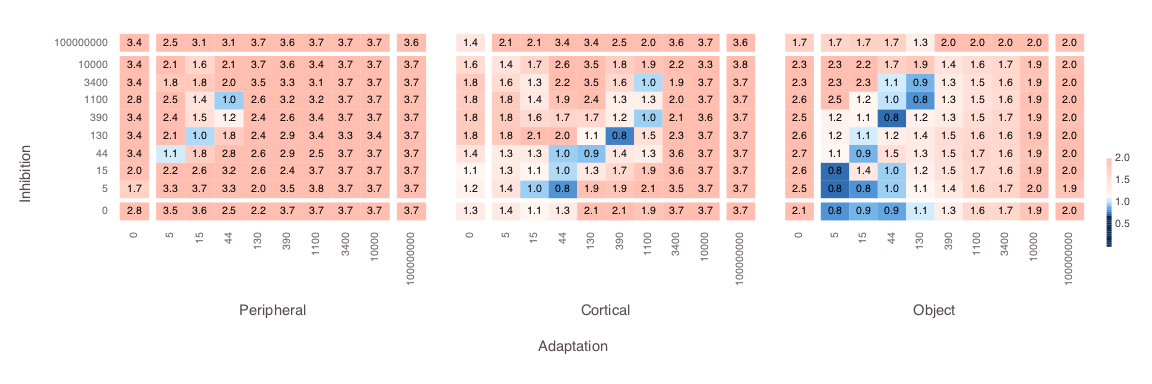

false

In [8]:
xvals = sort!(unique(dfplot_ind.a));
yvals = sort!(unique(dfplot_ind.m));

pl = plot(dfplot_ind,x=:a,y=:m,color=:eratio,xgroup=:level,label=:eratio_str,
     Geom.subplot_grid(Geom.label(position=:centered),Geom.rectbin,Coord.cartesian(ymin=0,xmin=0),
                       Scale.x_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot_ind.c_a,pad=0.25)),
                       Scale.y_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot_ind.c_m,pad=0.25)),
                       Guide.xticks(ticks=xvals,orientation=:vertical),
                       Guide.yticks(ticks=yvals,orientation=:horizontal)),
     Guide.xlabel("Adaptation"), Guide.ylabel("Inhibition"),
     Scale.color_continuous(minvalue=0,maxvalue=2,colormap=colorscale("RdBu",reverse=true,minvalue=0.0,
            maxvalue=2,colorstop=4,colorstart=0.65,midvalue=1.15)),
     Guide.colorkey(title=""),
     Theme(grid_line_width=0inch,point_label_font_size=8pt,point_label_color=colorant"black"))
draw(PDF(joinpath(plotdir,"fig4A.pdf"),8.5inch,3.5inch),pl)
draw(PNG(12inch,4inch),pl)

# Figure 4B-C

In [8]:
using DependentBootstrap

In [30]:
head(dfplot_ind)

,c_a,c_m,level,stream_error,length_error,eratio,a,m,rand,eratio_str
,Float64,Float64,String,Float64,Float64,Float64,Float64,Float64,Float64,String
1,0.0,0.0,Peripheral,0.474594,0.410298,2.84925,0.0,0.0,2.50459,2.8
2,0.0,5.0,Peripheral,0.261357,0.293669,1.73033,0.0,1.25,-0.541141,1.7
3,0.0,15.0,Peripheral,0.265539,0.388889,1.95525,0.0,2.25,1.07778,2.0
4,0.0,44.0,Peripheral,0.262928,1.0,3.34917,0.0,3.25,0.00811516,3.3
5,0.0,130.0,Peripheral,0.26317,1.0,3.36232,0.0,4.25,2.20466,3.4
6,0.0,390.0,Peripheral,0.262932,1.0,3.41908,0.0,5.25,-0.236597,3.4


In [31]:
hstr,hlen = human_error_by_sid(resample=100,N=N_for_pressnitzer_hupe_2006);
dfstr_ind = vcat(DataFrame(kind=dfplot_ind.level,error=dfplot_ind.stream_error),DataFrame(kind="human",error=hstr.x1));
dflen_ind = vcat(DataFrame(kind=dfplot_ind.level,error=dfplot_ind.length_error),DataFrame(kind="human",error=hlen.x1));

In [107]:
mean(hstr.x1)

0.1251241594611916

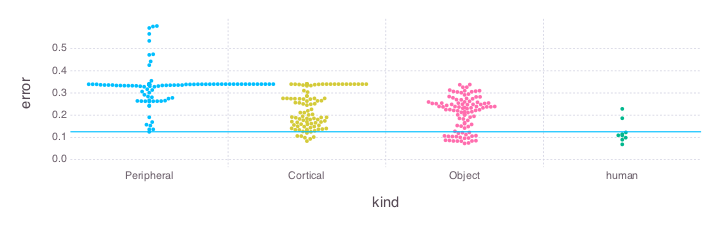

In [108]:
strplot = plot(dfstr_ind,y=:error,x=:kind,color=:kind,intercept=[mean(hstr.x1)],slope=[0],Geom.abline,Geom.beeswarm(padding=0.05mm),
    Coord.cartesian(ymax=0.6,ymin=0.0),Theme(key_position=:none,point_size=0.5mm))
draw(PNG(7.5inch,2.5inch),strplot)
draw(PDF(joinpath(plotdir,"fig4B.pdf"),7.5inch,2.5inch),strplot)

In [106]:
mean(hlen.x1)

0.22555251141552518

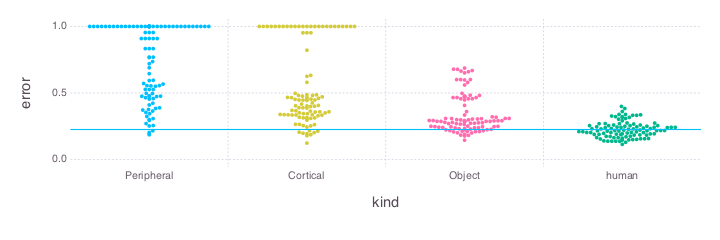

In [102]:
strplot = plot(dflen_ind,y=:error,x=:kind,color=:kind,intercept=[mean(hlen.x1)],slope=[0],Geom.abline,
    Geom.beeswarm(padding=0.05mm),Theme(key_position=:none,point_size=0.5mm))
draw(PNG(7.5inch,2.5inch),strplot)
draw(PDF(joinpath(plotdir,"fig4C.pdf"),7.5inch,2.5inch),strplot)

todo: I think the below bootstrap approach is unnecessary: i can just indicate the estimated standard error of the individual model estimates; this should be quite small, and so there should be strong confidence in the overall result.

In [133]:
bootstats = CSV.read("bootstats.csv")
head(bootstats)

,level,mean,min
,String⍰,Float64⍰,Float64⍰
1,Peripheral,2.6322,0.90404
2,Cortical,1.91128,0.747204
3,Object,1.48796,0.680741
4,Peripheral,2.6322,0.90404
5,Cortical,1.91128,0.747204
6,Object,1.48796,0.680741


In [246]:
num_sims = 20
allbootstats = []
params6 = @where(params,:Δf .== 6)
@showprogress for indices in dbootinds(1:num_sims,numresample=1000)
    df_summary = by(params6,fields) do row
        err = model_error(df,params;(k => row[1,k] for k in fields)...)
        DataFrame(eratio = error_ratio(err))
    end
    push!(allbootstats,by(rename_levels_for(df_summary,:eratio),:level) do x
        DataFrame(mean = mean(x.eratio),min = minimum(x.eratio))
    end)
end

InterruptException: InterruptException:

In [52]:
bootstats = vcat(allbootstats...)
CSV.write("bootstats.csv",bootstats)

"bootstats.csv"

In [53]:
stats = by(bootstats,:level) do x
    meanl,meanu = quantile(skipmissing(x.mean),[0.025,0.975])
    minl,minu = quantile(skipmissing(x.min),[0.025,0.975])
    DataFrame(mean = mean(skipmissing(x.mean)),meanl = meanl,meanu = meanu,
        min = mean(skipmissing(x.min)),minl = minl,minu = minu)
end

,level,mean,meanl,meanu,min,minl,minu
,String,Float64,Float64,Float64,Float64,Float64,Float64
1,Peripheral,2.6322,2.6322,2.6322,0.90404,0.90404,0.90404
2,Cortical,1.91128,1.91128,1.91128,0.747204,0.747204,0.747204
3,Object,1.48796,1.48796,1.48796,0.680741,0.680741,0.680741


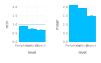

In [57]:
pl = hstack(plot(stats,x=:level,y=:min,ymin=:minl,ymax=:minu,intercept=[1.0],slope=[0],
                Geom.errorbar,Geom.bar,Geom.abline,Coord.cartesian(ymax=2.0),Guide.xticks(orientation=:horizontal)),
            plot(stats,x=:level,y=:mean,ymin=:meanl,ymax=:meanu,Geom.errorbar,
                Geom.bar,Coord.cartesian(ymax=2.0),Guide.xticks(orientation=:horizontal)))
draw(SVG(4inch,2.5inch),pl)

# Figure 3

In [9]:
best_models = @where(df_summary,:eratio .<= 1.0)[[:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]]
best_params = map(AuditoryBistabilityLE.read_params,eachrow(best_models))
len = plot_lengths_data(df,params,best_params,normlengths=true)

┌ Warning: iteration over DataFrameRow will return values in the future:use pairs(r::DataFrameRow) to get the current behavior
│   caller = ip:0x0
└ @ Core :-1


(human = [1.50591, 6.26513, 0.234947, 3.28313, 0.258005, 1.28991, 8.33683, 5.2465, 3.98745, 12.1784  …  2.971, 1.12832, 1.64572, 2.35851, 6.16073, 3.89585, 1.04757, 4.02171, 9.67638, 1.3605], simulation = [0.689376, 4.18569, 1.74119, 0.882558, 0.826261, 0.411221, 2.20618, 13.9042, 1.19061, 1.95029  …  1.61425, 0.818217, 1.10381, 0.396767, 0.450482, 4.82778, 1.80811, 0.366725, 1.10381, 2.34107])

In [10]:
p1 = plot_stream(df,params,best_params);

In [12]:
using RCall

In [13]:
R"library(logKDE)"
dens1 = R"logdensity($(len.human),to=20,bw='logG')";
dens2 = R"logdensity($(len.simulation),to=20,bw='logG')";

x1 = collect(R"$(dens1)[['x']]");
y1 = collect(R"$(dens1)[['y']]");
x2 = collect(R"$(dens2)[['x']]");
y2 = collect(R"$(dens2)[['y']]");
dens = DataFrame(x=[x1;x2],y=[y1;y2],experiment=[fill("human",length(x1));fill("simulation",length(x2))])

p2 = plot(dens,x=:x,y=:y,ymax=:y,ymin=fill(0,size(dens,1)),color=:experiment,Geom.line,Geom.ribbon,
         Guide.colorkey(pos=[0.5*Gadfly.w,-0.3*Gadfly.h]),
         Theme(lowlight_color=c->RGBA{Float32}(c.r, c.g, c.b, 0.3)),
         Coord.cartesian(xmax=20));

┌ Warning: RCall.jl: Warning in logdensity(`#JL`$`(len.human)`, to = 20, bw = "logG") :
│   Auto-range choice cut-off at 0.
└ @ RCall /Users/davidlittle/.julia/packages/RCall/Q4n8R/src/io.jl:110
┌ Warning: RCall.jl: Warning in logdensity(`#JL`$`(len.simulation)`, to = 20, bw = "logG") :
│   Auto-range choice cut-off at 0.
└ @ RCall /Users/davidlittle/.julia/packages/RCall/Q4n8R/src/io.jl:110


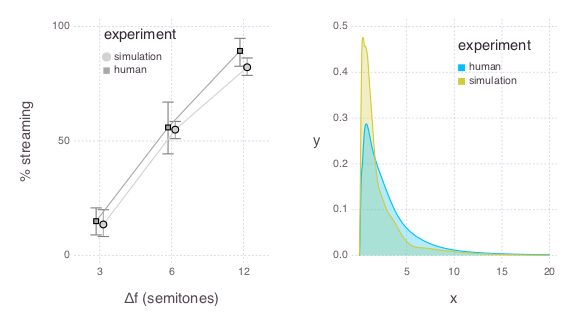

In [14]:
draw(PNG(6inch,3.5inch),hstack(p1,p2))
draw(PDF(joinpath(plotdir,"fig3.pdf"),5inch,2.5inch),hstack(p1,p2))

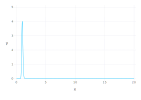

In [91]:
x = range(0,stop=20,length=2048)[2:end]
y = pdf.(LogNormal(0,0.1),x);
plot(x=x,y=y,Geom.line)

In [ ]:
dens = kde(len.human,boundary(-2,22),LogNormal())

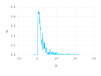

In [86]:
draw(SVG(4inch,3inch),plot(y=dens.density,x=dens.x,Geom.line))

In [81]:
dens = kde(len.simulation,boundary=(-2,22),kernel=LogNormal,bandwidth=0.5)

MethodError: MethodError: no method matching cf(::LogNormal{Float64}, ::Float64)
Closest candidates are:
  cf(!Matched::Distributions.DiscreteUniform, ::Real) at /Users/davidlittle/.julia/packages/Distributions/WHjOk/src/univariate/discrete/discreteuniform.jl:90
  cf(!Matched::Distributions.Bernoulli, ::Real) at /Users/davidlittle/.julia/packages/Distributions/WHjOk/src/univariate/discrete/bernoulli.jl:102
  cf(!Matched::Distributions.Binomial, ::Real) at /Users/davidlittle/.julia/packages/Distributions/WHjOk/src/univariate/discrete/binomial.jl:164
  ...

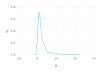

In [82]:
draw(SVG(4inch,3inch),plot(y=dens.density,x=dens.x,Geom.line))

In [61]:
mean(@where(df_summary,:eratio .<= 1.0).stream_error)

0.10608895620399679

In [71]:
dbootconf(@where(df_summary,:eratio .<= 1.0).stream_error,numresample=10_000)

2-element Array{Float64,1}:
 0.09424949537512599
 0.1172386064626312 

In [68]:
mean(human_error_by_sid()[1].x1)

0.1251241594611916

In [72]:
dbootconf(human_error_by_sid()[1].x1,numresample=10_000)

2-element Array{Float64,1}:
 0.10545161170065856
 0.14627867821209686

# Figure 5

In [33]:
datadir_all = joinpath("..","data","count_lengths","run_2018-11-28")
datadir_selected = joinpath("..","data","count_lengths","run_2018-11-30")

"../data/count_lengths/run_2018-11-30"

In [34]:
params_all = load_params(joinpath(datadir_all,"params.jld2"))
params_all[:pindex] = 1:size(params_all,1)
settings = joinpath(srcdir,"settings.toml")

results = []
for_results_in(joinpath(datadir_all,"data")) do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df_all = vcat(results...);

Progress: 100%|█████████████████████████████████████████| Time: 0:01:03


In [42]:
fields = [:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]
progress = Progress(nrow(unique(params_all[fields])))
herr = human_error(resample=10_000,N=N_for_pressnitzer_hupe_2006)
df_summary_all = by(params_all,fields) do row
    next!(progress)
    err = model_error(df_all,params_all;(k => row[1,k] for k in fields)...)
    DataFrame(stream_error = err.stream,length_error = err.lengths,eratio = error_ratio(err,herr),pindex = row.pindex[1])
end

Progress: 100%|█████████████████████████████████████████| Time: 0:02:11


,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ,stream_error,length_error,eratio,pindex
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.306539,0.460878,2.29635,1
2,0.0,5.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.291946,0.357271,1.99718,2
3,0.0,63.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.254462,1.0,3.34157,3
4,0.0,790.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.254462,1.0,3.34157,4
5,0.0,10000.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.254462,1.0,3.34157,5
6,0.0,0.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.302625,0.417442,2.17974,6
7,0.0,5.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.301851,0.417123,2.1759,7
8,0.0,63.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.254462,1.0,3.34157,8
9,0.0,790.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.254462,1.0,3.34157,9


In [36]:
params_selected = load_params(joinpath(datadir_selected,"params.jld2"))
params_selected[:pindex] = 1:size(params_selected,1)
settings = joinpath(srcdir,"settings.toml")

results = []
for_results_in(joinpath(datadir_selected,"data")) do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df_selected = vcat(results...);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:24


In [38]:
fields = [:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]
progress = Progress(nrow(unique(params_selected[fields])))
df_summary_selected = by(params_selected,fields) do row
    next!(progress)
    err = model_error(df_selected,params_selected;(k => row[1,k] for k in fields)...)
    DataFrame(stream_error = err.stream,length_error = err.lengths, eratio = error_ratio(err,herr),pindex = row.pindex[1])
end

Progress:  87%|████████████████████████████████████     |  ETA: 0:00:01┌ Warning: Expected 3 parameter entries. 
│   
Instead, only found entires:  = 
Instead, only found entires: 
│   string(found) = 2×36 DataFrame
│ Row │ f_W_m_σ │ f_c_m   │ t_c_a   │ t_c_m   │ f         │ t_W_m_c │ t_c_x   │ f_c_x   │ t_W_m_σ_t │ s_τ_σ     │ f_c_a   │ f_c_σ   │ s_c_m   │ f_τ_a     │ s_c_σ   │ Δt        │ s_τ_m     │ s_c_x   │ t_W_m_σ_ϕ │ t_τ_a     │ s_c_a   │ t_τ_m     │ t_c_σ   │ t_τ_x     │ s_W_m_c │ s_τ_a     │ f_W_m_c │ t_τ_σ     │ f_τ_σ     │ f_τ_x     │ Δf    │ t_W_m_σ_N │ f_τ_m     │ s_τ_x     │ s_W_m_σ │ pindex │
│     │ Float64 │ Float64 │ Float64 │ Float64 │ Quantity… │ Float64 │ Float64 │ Float64 │ Float64   │ Quantity… │ Float64 │ Float64 │ Float64 │ Quantity… │ Float64 │ Quantity… │ Quantity… │ Float64 │ Float64   │ Quantity… │ Float64 │ Quantity… │ Float64 │ Quantity… │ Float64 │ Quantity… │ Float64 │ Quantity… │ Quantity… │ Quantity… │ Int64 │ Float64   │ Quantity… │ Quantity… │ Float

,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ,stream_error,length_error,eratio,pindex
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,5.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.133125,0.290524,1.19928,1
2,5.0,5.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.43188,0.272008,2.35059,2
3,5.0,63.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.135811,0.180284,0.956804,3
4,5.0,0.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.150671,0.319523,1.336,4
5,5.0,5.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.432949,0.305663,2.43216,5
6,5.0,63.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.136061,0.19208,0.984898,6
7,5.0,0.0,0.2,0.0,0.0,0.2,63.0,0.0,0.2,0.146599,0.272428,1.21156,7
8,5.0,5.0,0.2,0.0,0.0,0.2,63.0,0.0,0.2,0.423751,0.293581,2.36765,8
9,5.0,63.0,0.2,0.0,0.0,0.2,63.0,0.0,0.2,0.132938,0.194443,0.977846,9


In [43]:
# if there is a selected entry with a revised eratio, use that value

df_summary_selected[:procedure] = "selected"
df_summary_all[:procedure] = "survey"
function favor_selected(vals,procedure)
    selected = findfirst(procedure .== "selected")
    if selected isa Nothing
        @assert length(vals) == 1
        first(vals)
    else
        vals[selected]
    end
end
    
df_summary_multi = @linq vcat(df_summary_all,df_summary_selected) |>
    by(fields,eratio = favor_selected(:eratio,:procedure),
              stream_error = favor_selected(:stream_error,:procedure),
              length_error = favor_selected(:length_error,:procedure))
head(df_summary_multi)

,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ,eratio,stream_error,length_error
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,2.29635,0.306539,0.460878
2,0.0,5.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,1.99718,0.291946,0.357271
3,0.0,63.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,3.34157,0.254462,1.0
4,0.0,790.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,3.34157,0.254462,1.0
5,0.0,10000.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,3.34157,0.254462,1.0
6,0.0,0.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,2.17974,0.302625,0.417442


In [44]:
mlevels = [(vars = [:f_c_a,:f_c_m], name = "Peripheral"),
          (vars = [:s_c_a,:s_c_m], name = "Cortical"),
          (vars = [:t_c_a,:t_c_m], name = "Object")]
dflevels = map(mlevels) do level
    result = by(df_summary_multi,level.vars) do slice
       DataFrame(c_a = first(slice[level.vars[1]]),c_m = first(slice[level.vars[2]]),
                 level = level.name, 
                 eratio = minimum(skipmissing(slice.eratio)),
                 stream_error = slice.stream_error[argmin(coalesce.(slice.eratio,-Inf))],
                 length_error = slice.length_error[argmin(coalesce.(slice.eratio,-Inf))])
            
    end
    result[[:c_a,:c_m,:level,:eratio,:stream_error,:length_error]]
end

dfplot = @linq vcat(dflevels...) |>
    transform(a = packaxes(:c_a,maxpad=false), m = packaxes(:c_m,maxpad=false)) |>
    transform(eratio_str = fmt.("01.2f",round.(:eratio,digits=2)))
head(dfplot)

,c_a,c_m,level,eratio,stream_error,length_error,a,m,eratio_str
,Float64,Float64,String,Float64,Float64,Float64,Float64,Float64,String
1,0.0,0.0,Peripheral,1.22543,0.194559,0.195026,0.0,0.0,1.23
2,0.0,5.0,Peripheral,0.880122,0.106644,0.197643,0.0,1.5,0.88
3,0.0,63.0,Peripheral,1.2371,0.18868,0.207823,0.0,2.5,1.24
4,0.0,790.0,Peripheral,1.01027,0.146695,0.184627,0.0,3.5,1.01
5,0.0,10000.0,Peripheral,1.06105,0.155903,0.190714,0.0,4.5,1.06
6,5.0,0.0,Peripheral,0.843017,0.119535,0.159062,1.5,0.0,0.84


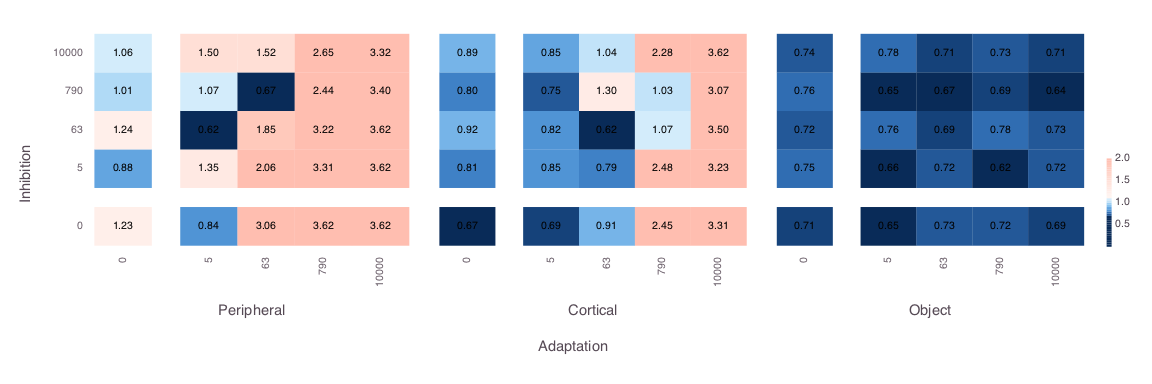

false

In [46]:
xvals = sort!(unique(dfplot.a));
yvals = sort!(unique(dfplot.m));

pl = plot(dfplot,x=:a,y=:m,color=:eratio,xgroup=:level,label=:eratio_str,
     Geom.subplot_grid(Geom.label(position=:centered),Geom.rectbin,Coord.cartesian(ymin=0,xmin=0),
                       Scale.x_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot.c_a,maxpad=false)),
                       Scale.y_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot.c_m,maxpad=false)),
                       Guide.xticks(ticks=xvals,orientation=:vertical),
                       Guide.yticks(ticks=yvals,orientation=:horizontal)),
     Guide.xlabel("Adaptation"), Guide.ylabel("Inhibition"),
     Guide.colorkey(title=""),
     Scale.color_continuous(minvalue=0,maxvalue=2,colormap=colorscale("RdBu",reverse=true,minvalue=0.0,
            maxvalue=2,colorstop=4,colorstart=0.65,midvalue=1.15)),
     Theme(grid_line_width=0inch,point_label_font_size=8pt,point_label_color=colorant"black"))
draw(PDF(joinpath(plotdir,"fig5A.pdf"),7.75inch,3.5inch),pl)
draw(PNG(12inch,4inch),pl)

In [131]:
hstr,hlen = human_error_by_sid(resample=50,N=N_for_pressnitzer_hupe_2006);
dfstr_mul = vcat(DataFrame(kind=dfplot.level,error=dfplot.stream_error),DataFrame(kind="human",error=hstr.x1));
dflen_mul = vcat(DataFrame(kind=dfplot.level,error=dfplot.length_error),DataFrame(kind="human",error=hlen.x1));

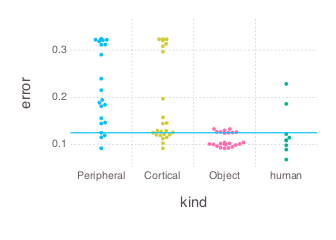

In [135]:
strplot = plot(dfstr_mul,y=:error,x=:kind,color=:kind,intercept=[mean(hstr.x1)],slope=[0],Geom.abline,Geom.beeswarm(padding=0.05mm),
    Coord.cartesian(ymax=0.35),Theme(key_position=:none,point_size=0.5mm))
draw(PNG(3.5inch,2.5inch),strplot)
draw(PDF(joinpath(plotdir,"fig5B.pdf"),3.25inch,2.5inch),strplot)

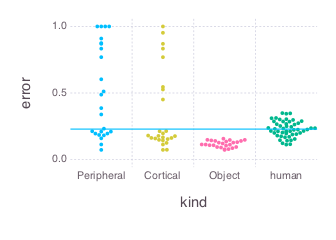

In [136]:
strplot = plot(dflen_mul,y=:error,x=:kind,color=:kind,intercept=[mean(hlen.x1)],slope=[0],Geom.abline,
    Geom.beeswarm(padding=0.05mm),Theme(key_position=:none,point_size=0.5mm))
draw(PNG(3.5inch,2.5inch),strplot)
draw(PDF(joinpath(plotdir,"fig5C.pdf"),3.5inch,2.5inch),strplot)

In [ ]:
# TODO: bootstrap these estimates (probably speed up rms estimation first? or run on cluster??)

In [101]:
stats = by(vcat(dflevels...),:level) do x
    DataFrame(mean = mean(skipmissing(x.eratio)),min = minimum(skipmissing(x.eratio)))
end

,level,mean,min
,String,Float64,Float64
1,Peripheral,1.04424,0.439445
2,Cortical,0.837476,0.439445
3,Object,0.490771,0.439445


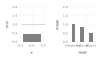

In [102]:
pl = hstack(plot(stats[stats.level.=="Cortical",:],x=[0],y=:min,intercept=[1.0],slope=[0],
                 Geom.bar,Geom.abline,Coord.cartesian(ymax=2.0),bartheme),
            plot(stats,x=:level,y=:mean,
                 Geom.bar,Coord.cartesian(ymax=2.0),Guide.xticks(orientation=:horizontal),bartheme))
draw(SVG(4inch,2.5inch),pl)
draw(PDF(joinpath(plotdir,"fig3D.pdf"),4inch,2.5inch),pl)

# Alternate Figure 3

In [81]:
best_models = @where(df_summary_multi,:eratio .<= 1.0)[[:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]]
best_params = map(AuditoryBistabilityLE.read_params,eachrow(best_models))
len = plot_lengths_data(df_selected,params_selected,best_params,normlengths=true)

(human = [0.0952138, 0.226794, 0.226794, 0.226794, 0.226794, 0.226794, 0.226794, 0.226794, 0.226794, 0.226794  …  16.138, 17.749, 19.4418, 23.0753, 25.0168, 25.0168, 33.6248, 38.4398, 40.9763, 46.3094], simulation = [3.9273, 0.593854, 3.15189, 0.70954, 0.332768, 0.162754, 1.38115, 9.44648, 6.72057, 6.72057  …  3.95032, 1.57482, 0.217199, 12.2522, 0.410075, 12.2522, 0.690084, 1.29355, 0.182979, 5.74616])

In [83]:
p1 = plot_stream(df_selected,params_selected,best_params)
p2 = len |> plot_lengths_qq;

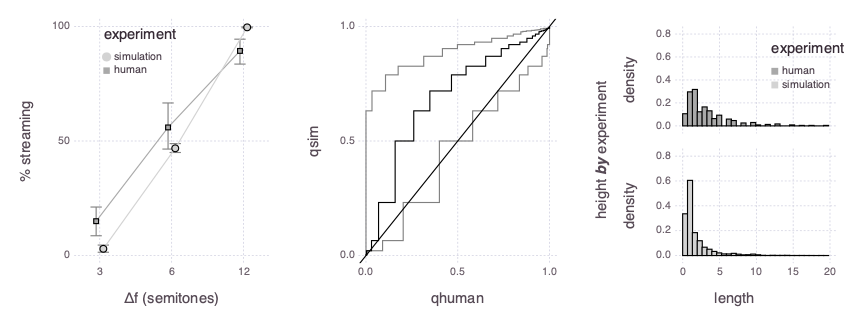

┌ Warning: Ignoring ~0.0% of human data
└ @ Main /Users/davidlittle/googledrive/Work/Software/bistable/src/plotting.jl:278


In [84]:
p3 = plot_lengths_hist(len,xmax=20,binstep=0.66)

draw(PNG(9inch,3.5inch),hstack(p1,p2,p3))
draw(PDF(joinpath(plotdir,"alt_fig3.pdf"),9inch,3.5inch),hstack(p1,p2,p3))

In [85]:
ApproximateTwoSampleKSTest(len.human,len.simulation)

┌ Warning: This test is inaccurate with ties
└ @ HypothesisTests /Users/davidlittle/.julia/packages/HypothesisTests/M3Ysg/src/kolmogorov_smirnov.jl:167


Approximate two sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.37136194334989836

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-43

Details:
    number of observations:   [365,121027]
    KS-statistic:              7.084185566147921


In [87]:
vals = map(dbootinds(len.human,numresample=1_000)) do ind
    ksstat(len.human[ind],len.simulation)
end
print(quantile(vals,[0.025,0.5,0.975]))

[0.193007, 0.424804, 0.699278]